# Charging a capacitor with minimum energy loss


Consider the well-known RC circuit depicted in Figure 1. The input voltage 
is denoted by $u$, the capacitor voltage is denoted by $x$, and the current 
is denoted by $i.$The standard equation relating these quantities is

$$\dot{x}(t)=\frac{1}{R C}(u(t)-x(t)),$$

where $R$ is the resistance of the resistor and $C$ is the capacitance of the 
capacitor.

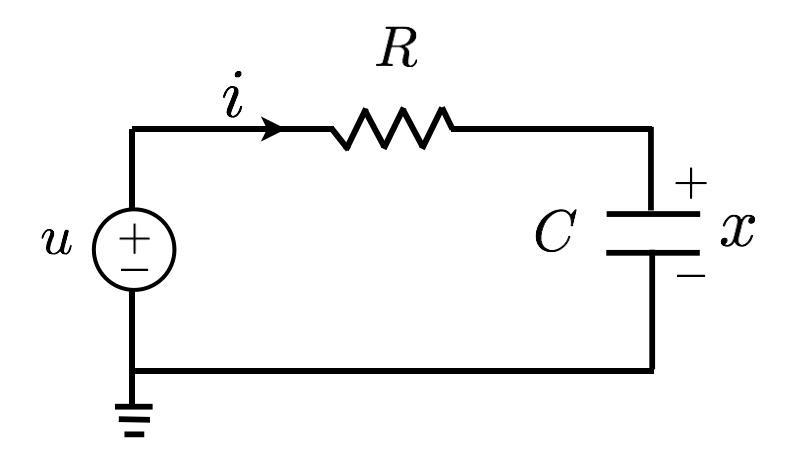

<center>Figure 1: RC circuit</center>

The goal is to charge the capacitor, assumed to be initially depleted, i.e., 
$x(0)=0$, in a given time $T$ to a given value $x(T)=x_{\text{des}}$,  while 
minimizing the energy loss in the resistor. Since the power in the resistor 
is $Ri(t)^2$ and by ohm's law $i(t) =\frac{x(t)-u(t)}{R}$ , the energy loss 
is

$$\min _{u(t)} \int_{0}^{T} \frac{(x(t)-u(t))^{2}}{R} d t.$$

Hereafter, we will assume for simplicity that $R=C=T=x_{\text {desired }}=1$. 

This problem can be easily solved using the Pontryagin's Maximum principle, 
leading to the optimal solution $u(t)=1+t, x(t)=t$. (in short: writting down 
the Hamiltonian $H=g+\lambda f=(x-u)^2+\lambda(u-x)$, the optimality conditions 
are $\frac{\partial H}{\partial u}=-2(x-u)+\lambda=0$ and $\dot{\lambda}=-\frac{\partial 
H}{\partial x}=-2(x-u)+\lambda=0$ so that $\lambda$ must be constant, $x-u$ 
must be constant, which implies that $x$ must be an affine function of $t$, 
and imposing the boundary conditions $x(0)=0$, $x(1)=1$, leads to $u(t)=1+t, 
x(t)=t$). However, in this live script the problem is discretized and dynamic 
programming is used.

The discretized equations, taking into account a sampling period $\tau$ and 
discretization steps $k\tau$ is

$$\begin{array}{l}{x(t)=e^{-\left(t-t_{k}\right)} \underbrace{x\left(t_{k}\right)}_{x_{k}}+\left(1-e^{-\left(t-t_{k}\right)}\right) 
\underbrace{u\left(t_{k}\right)}_{u_{k}} \quad t \in\left[t_{k}, t_{k+1}\right)} 
\\ {x_{k+1}=e^{-\tau} x_{k}+\left(1-e^{-\tau}\right) u_{k}}\end{array}$$

The cost function can also be discretized leading to

$$ \int_{0}^{1}(x(t)-u(t))^{2} d t =\sum_{k=0}^{h-1} \int_{t_{k}}^{t_{k+1}}\left(e^{-\left(t-t_{k}\right)} 
x_{k}+\left(1-e^{-\left(t-t_{k}\right)}\right) u_{k}-u_{k}\right)^{2} d t$$

$$=\sum_{k=0}^{h-1} \int_{t_{k}}^{t_{k+1}} e^{-2\left(t-t_{k}\right)} d t\left(x_{k}-u_{k}\right)^{2} 
=\sum_{k=0}^{h-1} \frac{1-e^{-2 \tau}}{2}\left(x_{k}-u_{k}\right)^{2} $$

The framework of stage decision problems does not take into account terminal 
constraints. 

Thus we apply a trick considering that a final control input is applied at 
the terminal time setting the state to the desired terminal value after $\Delta$ 
seconds, $x(1+\Delta)=1$. See Figure 2.

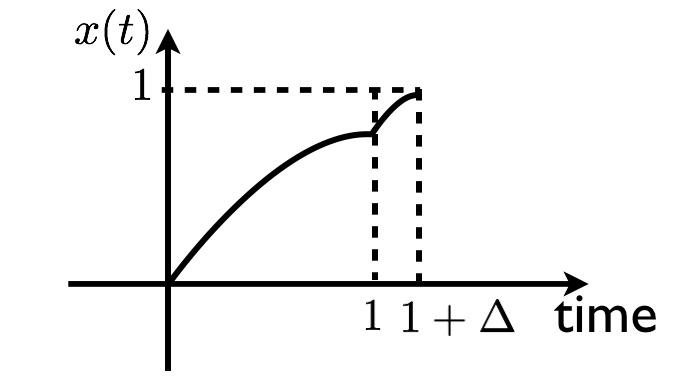

<center>Figure 2: Illustration of how to handle terminal constraints</center>

Since $x(1+\Delta)=e^{-\Delta} x(1)+\left(1-e^{-\Delta}\right) u(1)$ this 
terminal control input is given by $u(1)=\frac{1-e^{-\Delta} x(1)}{\left(1-e^{-\Delta}\right)}$.

The following cost approximates the original one that we are interested in

$$\int_{0}^{1+\Delta}(x(t)-u(t))^{2} d t= \int_{0}^{1}(x(t)-u(t))^{2} d 
t+\int_{1}^{1+\Delta}(x(t)-u(t))^{2} d t $$

$$=\left(\sum_{k=0}^{h-1} \frac{1-e^{-2 \tau}}{2}\left(x_{k}-u_{k}\right)^{2}\right)+\frac{1-e^{-2 
\Delta}}{2}\left(x_{h}-u_{h}\right)^{2} =\left(\sum_{k=0}^{h-1} \frac{1-e^{-2 
\tau}}{2}\left(x_{k}-u_{k}\right)^{2}\right)+\gamma(\Delta)\left(x_{h}-1\right)^{2} 
$$

where

$\gamma(\Delta)=\frac{1-e^{-2 \Delta}}{2\left(1-e^{-\Delta}\right)^{2}}$

Note that $\gamma(\Delta) \rightarrow \infty $ as $\Delta \rightarrow 0 
\quad $but $\gamma(\Delta)\left(x_{h}-1\right)^{2} \rightarrow 0 $ if $x_{h} 
\rightarrow 1$.

Applying Dynamic programming 

$$\begin{array}{l}{J_{k}\left(x_{k}\right)=\min _{u_{k}}\left(x_{k}-u_{k}\right)^{2}+J_{k+1}\left(e^{-\tau} 
x_{k}+\left(1-e^{-\tau}\right) u_{k}\right)} \\ {J_{h}\left(x_{h}\right)=\gamma(\Delta)\left(x_{h}-1\right)^{2}}\end{array}$$

results in 

$$\begin{array}{l}{u_{k}=K_{k} x_{k}+\alpha_{k}} \\ {J_{k}\left(x_{k}\right)=\theta_{k} 
x_{k}^{2}+\gamma_{k} x_{k}+\beta_{k}}\end{array}$$

The following scripts implements these equations allowing to see that in fact 
as $\Delta\rightarrow 0$ and $\tau \rightarrow 0$, the optimal solution $u(t)=1+t, 
x(t)=t$ is obtained.

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
#parameters definining the problem
Re = 1
C = 1
Delta = 0.1
gamma = (1-np.exp(-2*Delta))/(2*(1-np.exp(-Delta))**2)
h = 100
tau = 1/h
x0 = 0
a = np.exp(-tau/(Re*C))
b = Re*C*(1-a)
q = C/2*(1-np.exp(-2*tau/(Re*C)))
r = q
s = -q

# define matrices defining the dynamics and the cost function
# the state is augmented with a dummy constant state x_ equal to (second state)
# so that the terminal cost is gamma(x-x_)^2 = [x-x_]*[gamma -gamma; -gamma
# gamma]*[x;x_]
A = np.array([[a, 0],[0, 1]]) 
B = np.array([[b],[0]])
Q = np.array([[q, 0],[ 0, 0]])
S = np.array([[s],[0]])
R = r
QT = np.array([[gamma, -gamma],[-gamma, gamma]])
P = [np.zeros((2,2)) for idx in range(h+1)]
K = [np.zeros((2,2)) for idx in range(h+1)]
P[h] = QT
Ac = np.array([[-1/(Re*C), 0],[ 0, 0]])
Bc = np.array([[1/(Re*C)],[ 0]])

# Riccati equations to obtain the optimal policy
for k in range(h-1,-1,-1):
    P[k] = A.T@P[k+1]@A + Q - (S+A.T@P[k+1]@B)@np.linalg.inv(R+B.T@P[k+1]@B)@(S.T+B.T@P[k+1]@A)
    K[k] = -np.linalg.inv(R+B.T@P[k+1]@B)@(S.T+B.T@P[k+1]@A)

# simulate system with the optimal policy u = K_xdummy = Kx+alpha (since
# xdummy constaint a state which is constant)
t = tau*np.arange(0,h,1)
x = np.zeros((2,h+1))
x[:,[0]] = np.array([[x0],[1]])
n = 2
u = np.zeros((1,h))
for k in range(h):
    u[:,k] = K[k]@x[:,[k]]
    x[:,[k+1]] = A@x[:,[k]]+B@u[:,[k]]

v = x[0,:]

# continuous-time simulation by running a discrete-time simulation with a
# very small smapling period
N = 100
ts = tau/N
nl = h*N
uc = np.kron(u,np.ones((1,N)))
Ad, Bd = signal.cont2discrete((Ac, Bc, np.zeros((1, Ac.shape[0])), np.zeros((1, Bc.shape[1]))), ts)[:2]
xc = np.zeros((n,nl+1))
xc[:,[0]] = x[:,[0]]
for l in range(nl):
    xc[:,[l+1]] = Ad@xc[:,[l]]+Bd*uc[0][l]

vc = xc[0,:]
tc = ts*np.arange(0,nl+1)

In [ ]:
# plots
fig, axes = plt.subplots(1, 2)
ax = axes[0]
ax.plot(tc,vc)
ax.set_xlabel('time t')
ax.set_ylabel('x(t)')
ax.grid(True)

ax = axes[1]
ax.plot(tc[:-1],uc[0])
ax.set_ylabel('u(t)')
ax.set_ylim(0, 2)
ax.set_xlabel('time t')
ax.grid(True)